# MODS202 - Econometrics Final Project

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy.stats import t, f


In [4]:
# load data

columns_name = ["price", "crime", "nox", "rooms", "dist", "radial", "proptax", "stratio", "lowstat", "lprice", "lnox", "lproptax"]
raw_data = pd.read_csv('./data/HPRICE2.raw', delim_whitespace=True, header=None, names=columns_name)

raw_data.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678


Note that, in the following theoretical questions, we will refer to the dataset as the matrix $X$.

## Part 1: Cross-Section Data

**<font color="#0078D4">
    Question 1: State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators
are unbiased.
</font>**

The fundamental hypothesis is that the disturbance/error term is of zero conditional mean, i.e. 
$$
E(u|X) = E(u) = 0
$$
So, $X$ is uncorrelated with $u$.

Where $u$, as said above, represents the error term in the linear model (you can see it in the next question).

In other words, what you observe is independent from what you don't observe.

**<font color="#0078D4">
    Question 2: Show that under this assumption the OLS estimators are indeed unbiased.
</font>**

Consider the linear model:

$$
 y_i = \beta_0 + x_{i1}\beta_1 + x_{i2}\beta_2 + \ldots + x_{iK}\beta_K + u_i
$$

Defining $ y = (y_1, \ldots, y_n)^\prime $, $ x_k = (x_{1k}, \ldots, x_{nk})^\prime $, $u = (u_1, \ldots, u_n)^\prime $, we can write the model in matrix notations:

$$ y = X\beta + u $$

with $ \beta = (\beta_1, \ldots, \beta_K)^\prime $ and $ X = [x_1, x_2, \ldots, x_K] $. 

OLS estimates are obtained by solving the following minimization problem:

$$ \min_\beta \sum_{i=1}^{n} u_i^\prime u_i = u^\prime u = (y - X\beta)^\prime (y - X\beta) $$

The first-order condition is:

$$ -2X^\prime (y - X\beta) = 0 $$

This is known as an orthogonality condition between $ X $ and $ u = (y - X\beta) $ by taking expectations. 

Re-arranging terms:

$$ (X^\prime X)\beta = X^\prime y $$

If there is no multi-collinearity, then the matrix $ (X^\prime X) $ can be inverted, and the OLS estimator is given by:

$$ \hat{\beta} = (X^\prime X)^{-1}X^\prime y$$

This estimator is unbiased if the fundamental assumption (in matrix form) $ E(X^\prime u) = 0 $ is satisfied:

$$ E \hat{\beta} = E((X^\prime X)^{-1}X^\prime(X\beta + u)) = \beta + E(X^\prime u) = \beta $$


**<font color="#0078D4">
    Question 3: Explain the sample selection bias with an example from the course.
</font>**

Sample selection bias occurs when the data points included in the analysis are not representative of the broader population. This non-random selection can lead to misleading conclusions and affect the generalizability of the study. 

Selection bias can arise in various ways, for example, in the course we introduced the **Survivor Bias** illustrating the examples of RAF planes returning from war zones.
In this case, the data points are not representative of the broader population of planes, since the planes that were shot down are not included in the analysis.

Is important to note that the sample selection bias is a broader concept than the survivor bias, since it can arise in many other ways.

**<font color="#0078D4">
    Question 4: Explain the omitted variable bias with an example from the course.
</font>**

We have an omitted variable bias when we **omit** a variable that is correlated with the dependent variable.

In other words, when we leave out a viariable that matters for the dependent variable $y$.

In the course we saw the example in which we were trying to compute the wage of a person observing how many years of education the person has and the innate ability of that person. So, our model should be like:

$$ 
wage = \beta_0 + \beta_1 educ + \beta_2 abil + u.
$$

This model obtains $\beta_0$, $\beta_1$ and $\beta_2$ which are unbiased, i.e, we runned a regression in educ and abil and got these unbiased coeficients.

Although, imagine we exclude $\beta_2$, running a regression with only educ, that gives us the following model:

$$
wage = \tilde{\beta}_0 + \tilde{\beta}_1 educ + v
$$

In this new model we have that $v = \beta_2 abil + u$, and that $\tilde{\beta}_1 \neq \beta_1$.

In fact, when we don't include the other variable in our regression we obtain, in general, an biased estimator $\tilde{\beta}_1$.

It can be shown that $ E(\tilde{\beta}_1) = \beta_1 + \tilde{\beta}_2 \tilde{\delta}_1$, where $\tilde{\delta}_1$ is the sample covariance between educ and abil. So $\tilde{\beta}_1$ is unbiased only if $\tilde{\delta}_1=0$, which means that educ and abil are uncorrelated.

In our example, in general, we believe that $educ$ and $abil$ are positive correlated and as more hability leads to higher productivity we have that $\beta_2 > 0$, so we conclude that the OLS estimators for the equation $wage = \tilde{\beta}_0 + \tilde{\beta}_0 educ + v$ are on average too large.

**<font color="#0078D4">
    Question 5: Explain the problem of multicollinearity. Is it a problem in this dataset?
</font>**

The multicollinearity problem arises when two or more columns of the matrix $ X $ are linearly dependent (or almost).

If so, the determinant of the matrix $ (X^\prime X) $ is zero or almost zero.

$$
det(X^\prime X) = 0 
$$


In this case, the matrix $ (X^\prime X) $ is not invertible, and the OLS estimator cannot be computed.

A solution to this problem is to drop one of the linearly dependent columns or to add some observations to the dataset.

The dataset of the project does not have a multicollinearity problem because the determinant of the matrix $ (X^\prime X) $ is not zero, as shown in the code below:

In [5]:

X = raw_data[["crime", "nox", "rooms", "dist", "radial", "proptax", "stratio", "lowstat"]]

print("Determinant of the matrix (X'X): ", np.linalg.det(X.T.dot(X)))

Determinant of the matrix (X'X):  1.3888028105785436e+31


**<font color="#0078D4">
    Question 6: Create three categories of nox levels (low, medium, high), corresponding to the following
    percentiles: 0-39%, 40%-60%, 61%-100%
</font>**

In [6]:
percentiles = [0, 0.4, 0.6, 1]
labels = ["low", "medium", "high"]
raw_data["nox_cat"] = pd.qcut(raw_data["nox"], q=percentiles, labels=labels)

#create a column in raw_data that is 0 if nox_cat is low and 1 otherwise
raw_data["nox_cat_low"] = np.where(raw_data["nox_cat"] == "low", 0, 1)

raw_data.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax,nox_cat,nox_cat_low
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360,medium,1
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938,low,0
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938,low,0
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678,low,0
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678,low,0


**<font color="#0078D4">
    Question 7: Compute for each category of nox level the average median price and comment on your
    results
</font>**

In [7]:
avg_medianPrice_per_noxCat = raw_data.groupby("nox_cat")["price"].mean().reset_index().rename(columns={"price": "avg_medianPrice"})

avg_medianPrice_per_noxCat.head()

/tmp/ipykernel_21631/3756520965.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_medianPrice_per_noxCat = raw_data.groupby("nox_cat")["price"].mean().reset_index().rename(columns={"price": "avg_medianPrice"})


,nox_cat,avg_medianPrice
0,low,27170.609524
1,medium,20661.824742
2,high,18496.477387


**<font color="#0078D4">
    Question 8: Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis.
</font>**

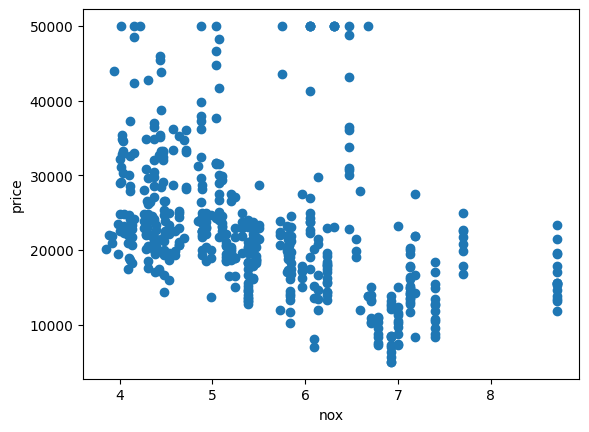

In [8]:
plt.scatter(raw_data["nox"], raw_data["price"])
plt.xlabel("nox")
plt.ylabel("price")
plt.show()

**<font color="#0078D4">
    Is this a Ceteris Paribus effect?
</font>**

Ceteris paribus is a concept used in statistical analysis where the effect of a single variable is examined while keeping all other variables constant. 

A scatter plot alone cannot demonstrate a ceteris paribus effect, because, a scatter plot shows the relationship between two variables, such as 'price' and 'nox', but it doesn't account for the influence of other variables. To assess the ceteris paribus effect, you would typically use regression analysis, where you can control for the impact of other variables and isolate the specific effect of 'nox' on 'price' while holding other factors constant.

So, what we can do is to ensure that the relationship between the variable of interest and the dependent variable appears linear in the scatterplot. 

If the relationship is nonlinear, the ceteris paribus assumption might be violated.

**<font color="#0078D4">
    Question 9: Run a regression of price on a constant, crime, nox, rooms, proptax.
    Comment on the histogram of the residuals.
    Interpret all coefficients.
</font>**

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.06e-91
Time:                        18:44:12   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

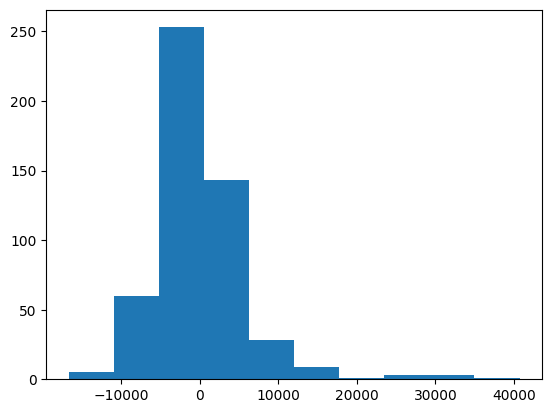

In [9]:
# create X and y
X = raw_data[["crime", "nox", "rooms", "proptax"]]
y = raw_data["price"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

# plot residuals
plt.hist(model.resid)
plt.show()

**<font color="#0078D4">
    Comment on the histogram of the residuals.
</font>**

The histogram of the residuals is not normally distributed. It is skewed to the right.
This means that the model is not a good fit.


**<font color="#0078D4">
    Interpret all coefficients.
</font>**

- The coefficient of crime is negative, which means that the higher the crime rate, the lower the price.
- The coefficient of nox is negative, which means that the higher the nox, the lower the price.
- The coefficient of rooms is positive, which means that the higher the number of rooms, the higher the price.
- The coefficient of proptax is negative, which means that the higher the proptax, the lower the price.

**<font color="#0078D4">
    Question 10: Run a regression of lprice on a constant, crime, nox, rooms, proptax. 
</font>**

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.50e-101
Time:                        18:44:12   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

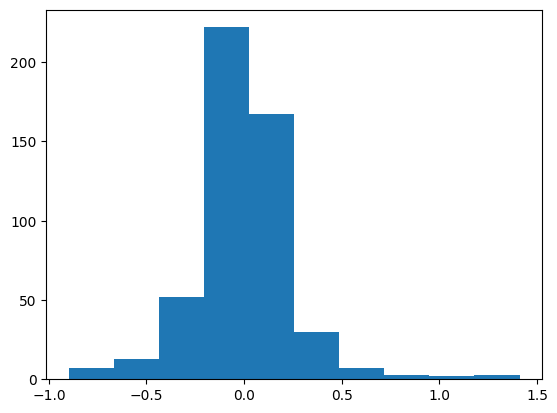

In [10]:
# Question 10: Run a regression of lprice on a constant, crime, nox, rooms, proptax.
# Comment on the histogram of the residuals.
# Interpret all coefficients.

# the only difference is that we use lprice instead of price
X0 = X
y = raw_data["lprice"]

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

df_u = model.df_resid
u=model.resid
SSR0 = model.ssr
print("SSR0=",SSR0)

# plot residuals
plt.hist(model.resid)
plt.show()


**<font color="#0078D4">
    Comment on the histogram of the residuals.
</font>**

The histogram of the residuals is more normal than the one from the previous question.
This is because we used the log of the price instead of the price itself.
This is a common transformation to do when the distribution of the dependent variable is skewed.
In this case, the distribution of the dependent variable is skewed to the right.

**<font color="#0078D4">
    Interpret all coefficients.
</font>**
- The coefficient of crime is negative and significant. This means that the higher the crime rate, the lower the price of the house.
- The coefficient of nox is negative and significant. This means that the higher the nox, the lower the price of the house.
- The coefficient of rooms is positive and significant. This means that the more rooms, the higher the price of the house.
- The coefficient of proptax is negative and significant. This means that the higher the proptax, the lower the price of the house.
- The coefficient of the constant is positive and significant. This means that the price of the house is positive even when all the other variables are 0.



**<font color="#0078D4">
    Question 11: Run a regression of lprice on a constant, crime, lnox, rooms, lproptax.
</font>**

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.77e-101
Time:                        18:44:12   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7505      0.253     38.476      0.0

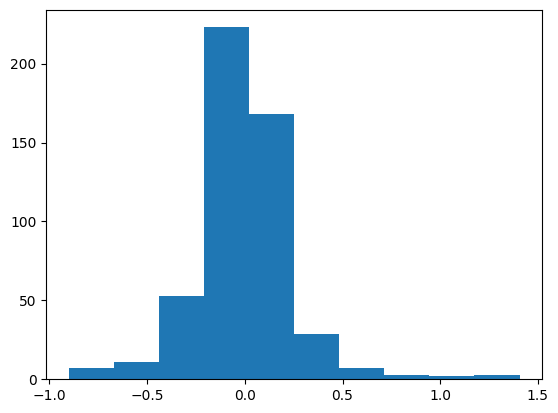

In [11]:
# Question 11: Run a regression of lprice on a constant, crime, lnox, rooms, lproptax.
# Comment on the histogram of the residuals.
# Interpret all coefficients.

# create X and y
X = raw_data[["crime", "lnox", "rooms", "lproptax"]]
y = raw_data["lprice"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

# plot residuals
plt.hist(model.resid)
plt.show()

**<font color="#0078D4">
    Comment on the histogram of the residuals.
</font>**

The histogram of the residuals is more symmetric than the previous one.
The mean is close to zero and the variance is constant.

**<font color="#0078D4">
    Interpret all coefficients.
</font>**
- The coefficient of crime is negative and significant. This means that the higher the crime rate, the lower the price of the house.
- The coefficient of lnox is negative and significant. This means that the higher the nox, the lower the price of the house.
- The coefficient of rooms is positive and significant. This means that the more rooms, the higher the price of the house.
- The coefficient of lproptax is negative and significant. This means that the higher the proptax, the lower the price of the house.

**<font color="#0078D4">
    Question 12: In the specification of question 10, test the hypothesis H0: $\beta_{nox} >0$ vs. H1: $\beta_{nox} < 0$ at the 10%
    level
</font>**

When we state the alternative like H1: $\beta_{nox} < 0$, we are doing a one-tailed test and we are really saying that the null hypothesis is $\beta_{nox} >= 0$. We only care about detecting that $\beta_j$ is different from zero when $\beta_j$ is actually negative. In other words, if we reject $\beta_j = 0$, then we automatically reject $\beta_j > 0$.

Therefore, it suffices to act as if we are testing H0: $\beta_{nox} = 0$ vs. H1: $\beta_{nox} < 0$.

That is a one-tailed test.

In [12]:
alpha = 0.1

# re-create X and y for question 10
X = raw_data[["crime", "nox", "rooms", "proptax"]]
y = raw_data["lprice"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# t-statistic for nox
t_Bnox = model.tvalues["nox"]
df = model.df_resid
print("t_nox=", t_Bnox)

# critical value for t-distribution
critical_value = t.ppf(alpha, df) # We are using alpha (instead of 1-alpha) because the test is t_nox < -c  with c > 0
print("critical_value=", critical_value)

print("Reject H0?  ", t_Bnox < critical_value)

t_nox= -3.5570290100073025
critical_value= -1.2832436320111769
Reject H0?   True


**<font color="#0078D4">
    Question 13: In the specification of question 10, test the hypothesis $H_0: \beta_{nox} = 0 $ vs. $H_1: \beta_{nox} ≠ 0 $ at the 10% level using the p-value of the test
</font>**

In this case we are testing the null hypothesis $H_0$ against a two-sided alternative hypothesis $H_1$.

The rejection rule is:
$$
    |{t}| > c
$$

where c is the critical value of the t-distribution with n-k-1 degrees of freedom and a significance level of 10% (5% each side).

OSS. We are using the summary of the question 12 above.

In [13]:
# with the p-value method
alpha = 0.1

p_value = model.pvalues["nox"]
print("p-value: ", p_value)

# compare p-value and alpha
print("Reject H0? : ", p_value < alpha)

p-value:  0.00041069590525890363
Reject H0? :  True


Or, with the t-statistic method... (just to verify)

In [14]:
# compute t-statistic
t_statistic_abs = np.abs(model.tvalues["nox"])
print("t-statistic: ", t_statistic_abs)

#compute critical value
critical_value = t.ppf(1-alpha/2, df=model.df_resid)
print("critical value: ", critical_value)

# compare t-statistic and critical value
print("Reject H0? : ", t_statistic_abs > critical_value)

t-statistic:  3.5570290100073025
critical value:  1.647900748316425
Reject H0? :  True


**<font color="#0078D4">
    Question 14: In the specification of question 10, test the hypothesis H0: $\beta_{crime} = \beta_{proptax} $ at the 1% level
</font>**

In order to perform this test, we define the variable $\theta = \beta_{crime} - \beta_{proptax}$. Then, we test the hypothesis H0: $\theta = 0$ vs. H1: $\theta ≠ 0$ at the 1% level.

Starting from the X of question 10:
$$
X_{question10} = \beta_0 + \beta_{crime} * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * proptax + \epsilon
$$
$$
\theta = \beta_{crime} - \beta_{proptax}
$$
and so:
$$
\beta_{crime} = \theta + \beta_{proptax}
$$
Rewriting $X_{question10}$ in terms of $\theta$:
$$
X_{question10} = \beta_0 + (\theta + \beta_{proptax}) * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * proptax + \epsilon
$$
$$
X_{question10} = \beta_0 + \theta * crime + \beta_{proptax} * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * proptax + \epsilon
$$
Finally, we can rewrite $X_{question10}$ in order to answer the question:
$$
X = \beta_0 + \theta * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * (crime + proptax) + \epsilon
$$

In [15]:
# create X and y
crime = raw_data["crime"]
proptax = raw_data["proptax"]
nox = raw_data["nox"]
rooms = raw_data["rooms"]
lprice = raw_data["lprice"]

X = np.column_stack((crime, nox, rooms, proptax + crime))
y = lprice

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.50e-101
Time:                        18:44:13   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

If the p-value is less than 0.01, you would reject the null hypothesis at the 1% level of significance.

In [16]:
alpha = 0.01
variable = "x1"  #this will be our theta

print("p_value: ", model.pvalues[variable])

print("Reject H_0 ?", model.pvalues[variable] < alpha)

p_value:  0.00032020806460970804
Reject H_0 ? True



**<font color="#0078D4">
    Question 15: In the specification of question 10, test the hypothesis $H0: \beta_{nox} = 0, \beta_{proptax} = 0$ at the 1% level
</font>**

In [17]:
alpha = 0.01

X = raw_data[["crime", "rooms"]]
y = raw_data["lprice"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

# degrees of freedom of the restricted model
df_r = model.df_resid

q = df_r - df_u

SSR1=model.ssr

# df_r and df_u are the degrees of freedom of the restricted (this one) and unrestricted (question 10) model respectively
F=( (SSR1-SSR0) / q)  / (SSR0/df_u)
print("F=", F)

p_val = f.sf(F, q, df_u)
print("p_val=",p_val)

print("\nReject H_0 ?", p_val < alpha)


                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     319.5
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.82e-90
Time:                        18:44:13   Log-Likelihood:                -57.988
No. Observations:                 506   AIC:                             122.0
Df Residuals:                     503   BIC:                             134.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0219      0.113     71.041      0.0

**<font color="#0078D4">
    Question 16: In the specification of question 10, test the hypothesis $H_0: \beta_{nox} = -500$, $\beta_{proptax} = -100$ at the 1% level using the p-value of the test
</font>**

In [18]:
# X = raw_data[["crime", "rooms"]]  # same as question 15
y = raw_data["lprice"] + 500*raw_data["nox"] + 100*raw_data["proptax"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

# degrees of freedom of the restricted model
df_r = model.df_resid

SSR1=model.ssr

# df_r and df_u are the degrees of freedom of the restricted (this one) and unrestricted (question 10) model respectively
q = df_r - df_u

F = ( (SSR1-SSR0) / q ) / ( SSR0/df_u )
print("\nF=", F)

p_val = f.sf(F, q, df_u)
print("\np_val=",p_val)

print("\nReject H_0 ?", p_val < alpha)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     149.7
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           9.89e-52
Time:                        18:44:13   Log-Likelihood:                -4473.9
No. Observations:                 506   AIC:                             8954.
Df Residuals:                     503   BIC:                             8966.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.014e+04    696.468     14.560      0.0

**<font color="#0078D4">
    Question 17: In the specification of question 10, test the hypothesis $H0: \beta_{nox} + \beta_{proptax} = -1000$ at the 1% 
level using the p-value of the test
</font>**

We can rewrite the null hypothesis as:

$$
H_0:  -1000 - \beta_{proptax} - \beta_{nox} = 0
$$

Then, we can define $\theta = -1000 - \beta_{proptax} - \beta_{nox}$ and test the hypothesis $H_0: \theta = 0$

$$  
    \beta_{nox} = -1000 - \beta_{proptax} - \theta
$$

We can rewrite the X of question 10 as:

$$
X = \beta_0 + \beta_{crime} * crime + (-1000 - \beta_{proptax} - \theta) * nox + \beta_{rooms} * rooms + \beta_{proptax} * proptax + \epsilon
$$

$$
X = \beta_0 + \beta_{crime} * crime - 1000 * nox - \theta * nox + \beta_{rooms} * rooms + \beta_{proptax} * (proptax - nox) + \epsilon
$$

$$
X = \beta_0 + \beta_{crime} * crime - \theta * nox + \beta_{rooms} * rooms + \beta_{proptax} * (proptax - nox) + \epsilon
$$

And the y will become:

$$
    y = log(price) + 1000 * nox
$$


In [19]:
# create X and y
crime = raw_data["crime"]
proptax = raw_data["proptax"]
nox = raw_data["nox"]
rooms = raw_data["rooms"]

X = np.column_stack((crime, nox, rooms, proptax - nox))
y = raw_data["lprice"] + 1000*raw_data["nox"]

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.580e+09
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:44:13   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

In [20]:
alpha = 0.01
variable = "x2"  #this will be our theta

print("p_val=", model.pvalues[variable])
print("Reject H_0 ?", model.pvalues[variable] < alpha)

p_val= 0.0
Reject H_0 ? True


**<font color="#0078D4">
    Question 18: In the specification of question 10, test the hypothesis that all coefficients are the same for 
observations with low levels of nox vs. medium and high levels of nox.
</font>**

In [21]:
mask = (raw_data["nox_cat_low"] == 0)

In [22]:
# nox low
model_1 = sm.OLS(y[mask], X[mask]).fit()
SSR1 = model_1.ssr

In [23]:
# nox medium or high
model_2 = sm.OLS(y[~mask], X[~mask]).fit()
SSR2 = model_2.ssr

Now we calculate the F-statistic and the p-value to decide:

In [24]:
SSR = SSR1 + SSR2
print(f"SSR0: {SSR0}")
print(f"SSR = SSR1+SSR2: {SSR}")

SSR0: 32.88043225721341
SSR = SSR1+SSR2: 31.581831339012133


In [25]:
# degrees of freedom of the restricted model
df_r = model_1.df_resid + model_2.df_resid

# n, k from the unrestricted model  (paragraph 7.4 book)
n, k = X0.shape

F = ((SSR0 - SSR) / SSR) * ((n - 2 * k) / k)
print("F=", F)

p_val = f.sf(F, k, n - k)
print("p_value=", p_val)

alpha = 0.05 # We assume a default alpha of 5%
print("\nReject H_0 ?", p_val < alpha)

F= 4.07896583648831
p_value= 0.001222895858145388

Reject H_0 ? True


**<font color="#0078D4">
    Question 19: Repeat the test of question 18 but now assuming that only the coefficients of nox and
proptax can change between the two groups of observations. State and test H0.
</font>**

Our null hypoteshis will be:

$$

$$